In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn

### Setting interfaces

In [2]:
x = np.load('X_channel.npy')
y = np.load('Y_channel.npy')
z = np.load('Z_channel.npy')


In [3]:
# Create the interfaces data frame
df = pn.DataFrame(data = {'X' : np.ravel(x), 'Y': np.ravel(y) , 'Z' : np.ravel(z), 'formation' : 'Default'})

In [4]:
# Cropping the interesting area
a = (df["X"] <= 785626.0)&(df["X"] > 785480.0)&(df["Y"] <= 189006.0)&(df["Y"] > 188910.0)
b = (df["X"] <= 785626.0)&(df["X"] > 785240.0)&(df["Y"] <= 188910.0)&(df["Y"] > 188818.0)
c = (df["X"] <= 785626.0)&(df["X"] > 785143.0)&(df["Y"] <= 188818.0)&(df["Y"] > 188771.0)
g = (df["X"] <= 785626.0)&(df["X"] > 785480.0)&(df["Y"] <= 188850.0)&(df["Y"] > 188630.0)
d = (df["X"] <= 785336.0)&(df["X"] > 785143.0)&(df["Y"] <= 188771.0)&(df["Y"] > 188724.0)
e = (df["X"] <= 785336.0)&(df["X"] > 785046.0)&(df["Y"] <= 188724.0)&(df["Y"] > 188700.0)
f = (df["X"] <= 785200.0)&(df["X"] > 785046.0)&(df["Y"] <= 188700.0)&(df["Y"] > 188630.0)


In [5]:
crop = df[a|b|c|d|e|f|g]

In [6]:
# Create the geo_data object. We just choose the cropped extent
geo_data = gp.create_data(extent=[crop['X'].min(), crop['X'].max(),
                                  crop['Y'].min(), crop['Y'].max(),
                                  crop['Z'].min(), crop['Z'].max()],
                         resolution=[189,29,10])

# Set the points to the gempy object
gp.set_interfaces(geo_data, df[a|b|c|d|e|f|g])#eo_data.interfaces.sum()

../../gempy/DataManagement.py:386: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.interfaces["series"] = [(i == _series).sum().argmax() for i in self.interfaces["formation"]]
../../gempy/DataManagement.py:388: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  for i in self.interfaces["formation"]]
../../gempy/DataManagement.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [7]:
# Sorting the points respect Y and X so when we pick a point every n we get a nice shape
geo_data.interfaces.sort_values(by=['Y', 'X'],
                                 ascending=True, kind='mergesort',
                                 inplace=True)

/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
geo_data.interfaces = geo_data.interfaces[::200]

### Setting foliation

In [9]:
# With two foliations works good enough. As you can see it is quite random its location

geo_data.foliation_add(X=geo_data.interfaces['X'].mean(),
                       Y=geo_data.interfaces['Y'].mean(),
                       Z=geo_data.interfaces['Z'].mean(), dip = 45., azimuth=180., polarity=1., formation='Default',
                       series='Default serie', order_series=1, isFault=False)

geo_data.foliation_add(X=geo_data.interfaces['X'].mean(),
                       Y=geo_data.interfaces['Y'].max(),
                       Z=geo_data.interfaces['Z'].mean(), dip = 45., azimuth=180., polarity=1., formation='Default',
                       series='Default serie', order_series=1, isFault=False)

In [10]:
geo_data.calculate_gradient()
geo_data.foliations

,X,Y,Z,dip,azimuth,polarity,formation,series,X_std,Y_std,Z_std,dip_std,azimuth_std,order_series,G_x,G_y,G_z,isFault
0,785244,188779,1669.15,45,180,1,Default,Default serie,NaN,NaN,NaN,NaN,NaN,1.0,8.659561e-17,-0.707107,0.707107,False
1,785244,188910,1669.15,45,180,1,Default,Default serie,NaN,NaN,NaN,NaN,NaN,1.0,8.659561e-17,-0.707107,0.707107,False


In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
# fig = plt.figure()
# ax = fig.gca(projection='3d')



# ax.scatter(geo_data.interfaces['X'], geo_data.interfaces['Y'], geo_data.interfaces['Z'], )

# ax.quiver(geo_data.foliations['X'], geo_data.foliations['Y'], geo_data.foliations['Z'],
#           geo_data.foliations['G_x'], geo_data.foliations['G_y'], geo_data.foliations['G_z'], length=100, normalize=True)

In [12]:
# So far is used 60 points
geo_data.interfaces.shape

(61, 6)

#### Preparing data to interpolate

In [13]:
interp_data = gp.InterpolatorInput(geo_data, u_grade = [3], verbose=['potential_field_at_interfaces'])

I am in the setting
float32
I am here
[2, 2]


In [14]:
sol = gp.compute_model(interp_data)

[3]


/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.6606702618892086e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


Value of the potential field at the interfaces __str__ = [ 0.21592547]


<IPython.core.display.Javascript object>


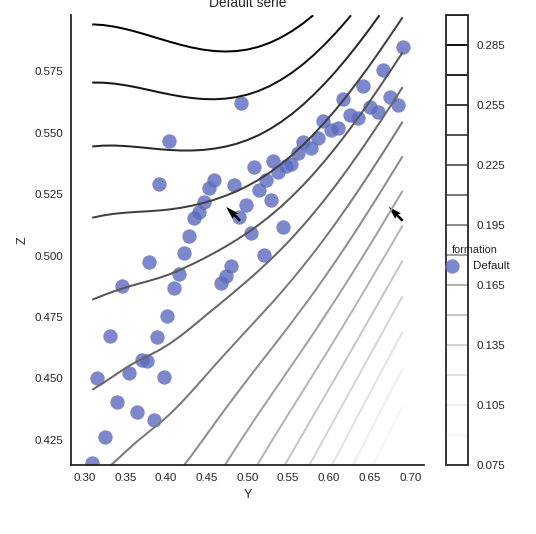

In [18]:
gp.plot_potential_field(interp_data, sol[1,:], 17, direction='x')
plt.colorbar()

In [ ]:
pot_field(0.4, interp_data)

In [17]:
gp.set_grid(geo_data, resolution=[189,29,1])

In [18]:
interp_data = gp.InterpolatorInput(geo_data, u_grade = [3], verbose=['potential_field_at_interfaces'])

I am in the setting
float32
I am here
[2, 2]


In [23]:
interp_data.extent

array([0.2501, 0.7714414634146342, 0.30955121951219511,
       0.69064878048780487, 0.4147089939024391, 0.5978461890243906], dtype=object)

In [20]:
from scipy.optimize import root

grid_val = interp_data.interpolator.tg.grid_val_T.get_value()
grid_val_o = interp_data.interpolator.tg.grid_val_T.get_value()
def pot_field(z,a = interp_data):
    grid_val[:,2] = z
    #print(grid_val)
    a.interpolator.tg.grid_val_T.set_value(grid_val)
    print(a.interpolator.tg.grid_val_T.get_value())
    #a.update_interpolator()
    sol = gp.compute_model(a)[1, :]
   # print(sol)
    print(a.interpolator.tg.grid_val_T.get_value())
    return sol

In [28]:
a = np.ones_like(grid_val_o[:, 2])*0.000001
b = np.ones_like(grid_val_o[:, 2])*20
av = (b+a)/2
print(pot_field(av))

for i in range(10):
    print(i)
    sol_ = pot_field(av, interp_data)
    print('sol', sol_)
    print('bool',(sol_>0.21592547).sum())
    a[(sol_<0.21592547)] = av[(sol_<0.21592547)]
    b[(sol_>0.21592547)] = av[(sol_>0.21592547)]
    print('a', a)
    print('b', b)
    av = (b+a)/2


[[  0.25011      0.30956122  10.00000095]
 [  0.25011      0.32316163  10.00000095]
 [  0.25011      0.33678588  10.00000095]
 ..., 
 [  0.77145147   0.66343415  10.00000095]
 [  0.77145147   0.67705834  10.00000095]
 [  0.77145147   0.69065881  10.00000095]]
[3]
Value of the potential field at the interfaces __str__ = [ 0.21592547]
[[  0.25011      0.30956122  10.00000095]
 [  0.25011      0.32316163  10.00000095]
 [  0.25011      0.33678588  10.00000095]
 ..., 
 [  0.77145147   0.66343415  10.00000095]
 [  0.77145147   0.67705834  10.00000095]
 [  0.77145147   0.69065881  10.00000095]]
[ 0.19515501  0.19169636  0.18823166 ...,  0.01160716  0.00814246
  0.00468381]
0
[[  0.25011      0.30956122  10.00000095]
 [  0.25011      0.32316163  10.00000095]
 [  0.25011      0.33678588  10.00000095]
 ..., 
 [  0.77145147   0.66343415  10.00000095]
 [  0.77145147   0.67705834  10.00000095]
 [  0.77145147   0.69065881  10.00000095]]

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.6606702618892086e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)



[3]
Value of the potential field at the interfaces __str__ = [ 0.21592547]
[[  0.25011      0.30956122  10.00000095]
 [  0.25011      0.32316163  10.00000095]
 [  0.25011      0.33678588  10.00000095]
 ..., 
 [  0.77145147   0.66343415  10.00000095]
 [  0.77145147   0.67705834  10.00000095]
 [  0.77145147   0.69065881  10.00000095]]
sol [ 0.19515501  0.19169636  0.18823166 ...,  0.01160716  0.00814246
  0.00468381]
bool 0
a [ 10.00000095  10.00000095  10.00000095 ...,  10.00000095  10.00000095
  10.00000095]
b [ 20.  20.  20. ...,  20.  20.  20.]
1
[[  0.25011      0.30956122  15.        ]
 [  0.25011      0.32316163  15.        ]
 [  0.25011      0.33678588  15.        ]
 ..., 
 [  0.77145147   0.66343415  15.        ]
 [  0.77145147   0.67705834  15.        ]
 [  0.77145147   0.69065881  15.        ]]
[3]
Value of the potential field at the interfaces __str__ = [ 0.21592547]
[[  0.25011      0.30956122  15.        ]
 [  0.25011      0.32316163  15.        ]
 [  0.25011      0.336785

In [29]:
sol_.shape

(5481,)

(array([ 129.,  334.,  553.,  758.,  966.,  967.,  758.,  553.,  334.,  129.]),
 array([ 0.00468381,  0.02373093,  0.04277805,  0.06182517,  0.08087229,
         0.09991941,  0.11896653,  0.13801365,  0.15706077,  0.17610789,
         0.19515501]),
 <a list of 10 Patch objects>)

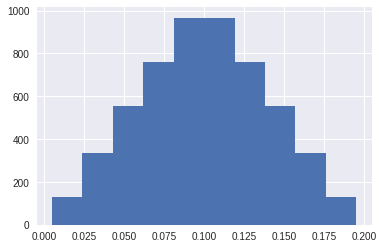

In [30]:
%matplotlib inline
plt.hist(sol_)

In [ ]:
res = root(pot_field, grid_val_o[:, 2],
            options={'xtol': 1e-2, 'disp': True, 'maxiter': 10})

In [ ]:
import pymc as pm

In [ ]:
std.shape, mean.shape

In [ ]:
z_grid = pm.Normal('Z_grid', mean, 1./std)

In [ ]:
pm.Normal?

In [ ]:
input_ = interp_data.get_input_data()

@pm.deterministic
def gempy_model(value=0, Z_grid =  z_grid):
    grid_val[:,2] = Z_grid
    interp_data.interpolator.tg.grid_val_T.set_value(grid_val)
    sol = interp_data.th_fn(*input_)
    print(np.array(sol[0, 1, :]))
    # return solution
    return sol[1, :]

@pm.stochastic
def like(value=0, mod = gempy_model):
    dist = np.array(gempy_model) - np.array(pot_layer)
    print(dist)
    return pm.Normal('like',dist, 1./std,
                     value=np.zeros_like(mean), observed=True)
# @pymc.stochastic
# def find_pot(value=0, pot_field=gempy_model):
#     pot_field[1,:] - pot

In [ ]:
pm.normal_like?

In [3]:
from skimage import measure


measure.marching_cubes_lewiner?

In [ ]:
# This is to export the block in vtk. only useful for visualization
gp.export_vtk_rectilinear(geo_data,sol[0,:])

In [ ]:
from skimage import measure


vertices, simplices,g, v = measure.marching_cubes_lewiner(sol[1,:].reshape(189,29,1),
                                                          0.21592547, #T This command is the value of the potential field. So far we can only print it
                                                                    # when we compute the solution so it has to be changed manually every time. I will work on this
                                            spacing=(50.0, 50.0, 50.0)) # This command controls how many points you export from the surface
x,y,z = zip(*vertices) # the vertices have to be rescaled again to right dimension and area. Alex has done it

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = geo_data.grid.grid[:,0]
ys = geo_data.grid.grid[:,1]
zs = geo_data.grid.grid[:,2]

ax.scatter(x,y,z)
#ax.scatter(geo_data.interfaces['X'], geo_data.interfaces['Y'], geo_data.interfaces['Z'], color = 'red')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()